# Лабораторная работа №3
## Проверка статистичеких гипотез о виде закона рспределения.

*__Задание 1.__* В соответсвии с вариантом сформировать выборку из 200 случайных чисел. Проверить гипотизу о соответствии выборке теоритическому закону распределения по критерию согласия Пирсона.

In [42]:
import math
import random
import numpy as np
import scipy.stats as sts
import pandas as pd
import matplotlib.pyplot as plt

def get_sample_data(n):
    l_a = 1
    l_b = 5
    Ei = []

    for i in range(n):
        Ei.append(random.uniform(0, 1))
        
    Xi = [0] * n
    Yi = [0] * n

    for i in range(0, n):
        Xi[i] = Ei[i] * (l_b - l_a) + l_a
        Yi[i] = math.sqrt(Xi[i])
    
    return Yi

In [3]:
def histogram(sample, m):
    sample.sort()
    
    A = [sample[0]]
    B = []
    
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    
    B.append(sample[-1])

 
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    del x[-1]
    x.append(s)
        
    return A, B, d, x, y

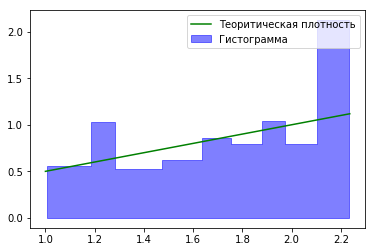

In [143]:
n = 200

M = 10 # 
m = n // M       

a = 1.
b = math.sqrt(5)

sample_Y = get_sample_data(n)

A, B, delta, x, y = histogram(sample_Y, m)

plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="Гистограмма")

xp = np.linspace(a, b, 100)
yp = xp / 2 

plt.plot(xp, yp, label='Теоритическая плотность', color='g')    
plt.legend()

In [144]:
tb = pd.DataFrame(data={"Ai" : A, "Bi": B, "delta": delta, "кол-во значений": [ m ] * len(delta), "средняя плотность": y})
tb

,Ai,Bi,delta,кол-во значений,средняя плотность
0,1.007278,1.186200,0.178922,20,0.558903
1,1.186200,1.283469,0.097268,20,1.028082
2,1.283469,1.473615,0.190146,20,0.525911
3,1.473615,1.635496,0.161881,20,0.617738
4,1.635496,1.752206,0.116710,20,0.856827
5,1.752206,1.878271,0.126065,20,0.793242
6,1.878271,1.974638,0.096368,20,1.037690
7,1.974638,2.101032,0.126394,20,0.791178
8,2.101032,2.148162,0.047130,20,2.121810
9,2.148162,2.231252,0.083090,20,1.203510


In [145]:
def F_X(x_t):
    return x_t ** 2 / 4  - 1 / 4

#### Рассчитаем теоретическую вероятность попадания случайной величины в $i$-й интервал при условии, что гипотеза верна.


In [146]:
pi = [ F_X(B[i]) - F_X(A[i]) for i in range(len(A)) ]
pi_ = [ m / n ] * len(A)


FA = [ F_X(A[i]) for i in range(len(A)) ]
FB = [ F_X(B[i]) for i in range(len(B)) ]

Вычислим значение критерия $\chi^2$ по формуле:

$$ \chi^2 = n\sum_{i=1}^M \frac{(p_i-p_i^*)^2}{p_i}=\sum_{i=1}^M \frac{(\nu_i-np_i)^2}{np_i}$$

In [147]:
Hi = [ (pi[i] - pi_[i]) ** 2 / pi[i]  for i in range(len(pi)) ]

tb2 = pd.DataFrame(data={"$F(A_i)$" : FA, "$F(B_i)$": FB, "$p_i$": pi, "$p_i^*$": pi_, "$\chi_i$": Hi})
tb2

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,0.003652,0.101768,0.098115,0.1,0.000036
1,0.101768,0.161823,0.060055,0.1,0.026569
2,0.161823,0.292885,0.131062,0.1,0.007362
3,0.292885,0.418712,0.125826,0.1,0.005301
4,0.418712,0.517556,0.098844,0.1,0.000014
5,0.517556,0.631975,0.114419,0.1,0.001817
6,0.631975,0.724799,0.092824,0.1,0.000555
7,0.724799,0.853584,0.128785,0.1,0.006434
8,0.853584,0.903650,0.050066,0.1,0.049803
9,0.903650,0.994621,0.090972,0.1,0.000896


In [148]:
Hi_2 = sum(Hi)
print("Chi^2 = " +  str(Hi_2))

Chi^2 = 0.0987860547564654


In [149]:
k = M - 1 # Так как не зависит ни от каких параметров
print("Кол-во степеней свободы: " + str(k))

Кол-во степеней свободы: 9


В таблице $\chi_{0.01, 9}=21.07$, следовательно оснований отвергать гипотизу H0 нет

*__Задание 2.__* В соответствии с вариантом (см. задание 1) сформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

In [150]:
n = 30
sample_Y2 = get_sample_data(n)

Построим вариационный ряд:

In [151]:
sample_Y2.sort()
tb3 = pd.DataFrame(data={"Значение" : sample_Y2})
tb3.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Значение,1.128322,1.183705,1.186308,1.203442,1.276044,1.3046,1.45863,1.473169,1.483663,1.516464,...,1.834085,1.842681,1.907592,1.931458,1.935988,1.959291,1.997569,2.043566,2.11441,2.131796


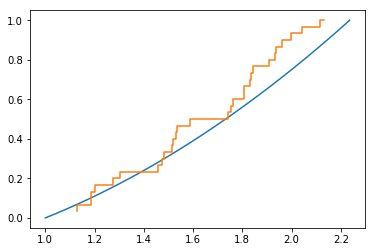

In [152]:
from statsmodels.distributions.empirical_distribution import ECDF
emp_f = ECDF(sample_Y2)

xt = np.linspace(a, b, 100)
yt = xt ** 2 / 4  - 1 / 4


plt.plot(xt, yt, label='Теоритическая ф-ция распр.')
plt.step(emp_f.x, emp_f.y, label='Эмпирическая ф-ция распр.')

Найдем $d_n = max|F(x_i)-F_n(x_i)| = max(d_n^+,d_n^-)$, где $d_n^+=max|\frac{i}{n}-F(x_i)|, d_n^-=max|\frac{i-1}{n}-F(x_i)|$:

In [153]:
dn_p = [abs((i + 1) / n - F_X(sample_Y2[i])) for i in range(len(sample_Y2))]
dn_m = [abs(i / n - F_X(sample_Y2[i])) for i in range(len(sample_Y2))]

dn = max(max(dn_p), max(dn_m))
print('Dn: ' + str(dn))

Dn: 0.1569618353662805


Пусть для определенности будем проверять для вероятности ошибки первого рода $\alpha = 0.05$. Тогда наша доверительная вероятность равна $\gamma = 1-\alpha = 0.95$.

In [154]:
lamb = math.sqrt(n) * dn
print('lambda: ' + str(lamb)) 

lambda: 0.8597153789752399


В таблице Колмагорова $\lambda_{\gamma} = 1.36$. Следовательно оснований отвергать гипотизу H0 нет.

*__Задание 3.__* В соответствии с вариантом (см. задание 1) сформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [155]:
n = 50
sample_Y3 = get_sample_data(n)
sample_Y3.sort()

Выдвинем гипотезу $H_0$, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Мизеса. Пусть для определенности будем проверять для вероятности ошибки первого рода $\alpha = 0.05$.

In [156]:
Fn_Xi = [ (i + 0.5) / n for i in range(n) ]
F_Xi = [ F_X(sample_Y3[i]) for i in range(n) ]

Di = [ ((Fn_Xi[i] - F_Xi[i]) ** 2) for i in range(n) ]

tb4 = pd.DataFrame(data={"$y$": sample_Y3, "$F_n$": Fn_Xi, "$F$": F_Xi, "$\delta$": Di})
tb4

,$y$,$F_n$,$F$,$\delta$
0,1.006237,0.01,0.003128,4.722393e-05
1,1.052892,0.03,0.027145,8.149880e-06
2,1.083001,0.05,0.043223,4.593151e-05
3,1.100363,0.07,0.052699,2.993081e-04
4,1.113623,0.09,0.060039,8.976555e-04
5,1.150989,0.11,0.081194,8.297963e-04
6,1.188675,0.13,0.103237,7.162658e-04
7,1.227043,0.15,0.126409,5.565495e-04
8,1.247564,0.17,0.139104,9.545777e-04
9,1.384180,0.19,0.228989,1.520112e-03


In [157]:
mizes = 1. / (12 * n) + sum(Di)

print('Mizes : ' + str(mizes))

Mizes : 0.04919176744549668


Так как кртитическое значение статистики Мизеса на уровне значимости $\alpha=0.05$ по таблице равно $n\sigma^2_{\alpha}=0.461$, то нет оснований отвергать гипотезу $H_0$.

# Лабораторная работа №4
## Интервальные оценки.

*__Задание 1.__* Доверительный интервал для математического ожидания СВ.

_1.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины._

Несмещенная состоятельная оценка математического ожидания вычисляется по формуле:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [43]:
n = 20

s4y = get_sample_data(n)

MO = sum(s4y) / n

print('Несмещенная оц. М.О.: ' + str(MO))

Несмещенная оц. М.О.: 1.7074982482054029


_1.2. Найти точечную оценку дисперсии случайной величины._

Несмещенная состоятельная оценка дисперсии:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [44]:
def emp_d(sample, mo, n):
    return sum([(xi - mo) ** 2 for xi in sample]) / (n - 1)

In [45]:
disp = emp_d(s4y, MO, n)

print('Точечная оценка дисперсии: ' + str(disp))

Точечная оценка дисперсии: 0.12598756145734816


_1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости._

Уровенями значимости $\gamma$ будут служить значения $0.90$, $0.95$, $0.98$, $0.99$, $0.999$.

Построим доверительный интервал для каждого $t$:

$$\bar{x}-\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}\le m_x <\bar{x}+\frac{s\cdot t_{\gamma, n-1}}{\sqrt{n-1}}$$

In [46]:
gammas = [0.9, 0.95, 0.98, 0.99, 0.999]
# кол-во уровней свободы = n - 1
gamma_val = [1.72913, 2.09302, 2.53948, 2.860943, 3.88332]

intervals = [ ]

for i in range(len(gammas)):
    left = MO - math.sqrt(disp) * gamma_val[i] / math.sqrt(n - 1)
    right = MO + math.sqrt(disp) * gamma_val[i] / math.sqrt(n - 1)
    
    intervals.append((left, right))

tb5 = pd.DataFrame(data={"Интервал": [str(left) + ' < m < ' + str(right) for left, right in intervals], 
                         "$\gamma$": gammas})
tb5

,Интервал,$\gamma$
0,1.5666943494315961 < m < 1.8483021469792096,0.900
1,1.53706260935144 < m < 1.8779338870593658,0.950
2,1.5007071539220889 < m < 1.9142893424887168,0.980
3,1.4745302651332042 < m < 1.9404662312776015,0.990
4,1.3912776076599846 < m < 2.023718888750821,0.999


 _1.4. Построить график зависимости величины доверительного интервала от уровня значимости._

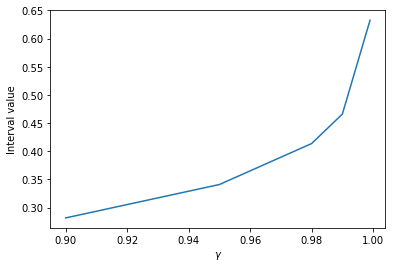

In [47]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3)._

Плотность распределения равна $f(y) = \frac{x}{2}, 1<y<\sqrt5$. Тогда теоретическая дисперсия будет равна:

$$D[X] = M[X^2] - M^2[X] = \int_{1}^{\sqrt5} \frac{x^3}{2}dx - \big{(}\int_{1}^{\sqrt5} \frac{x^2}{2}dx\big{)}^2$$



[Решение на wolframalpha](https://www.wolframalpha.com/input/?i=int+x%5E3%2F2,x%3D1..sqrt(5)+-++\(int+x%5E2%2F2,x%3D1..sqrt\(5\)\)%5E2])

In [48]:
dispt = 0.12113

print('Теоритическая дисперсия: ' + str(dispt))

Теоритическая дисперсия: 0.12113


_1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости._

In [49]:
intervals2 = [ ]

for i in range(len(gammas)):
    left = MO - math.sqrt(dispt) * gamma_val[i] / math.sqrt(n - 1)
    right = MO + math.sqrt(dispt) * gamma_val[i] / math.sqrt(n - 1)
    
    intervals2.append((left, right))

tb6 = pd.DataFrame(data={"Интервал": [str(left) + ' < m < ' + str(right) for left, right in intervals2], 
                         "$\gamma$": gammas})
tb6

,Интервал,$\gamma$
0,1.569435439623432 < m < 1.8455610567873737,0.900
1,1.540380553400364 < m < 1.8746159430104417,0.950
2,1.504732845293104 < m < 1.9102636511177018,0.980
3,1.479065553281985 < m < 1.9359309431288207,0.990
4,1.397433611178378 < m < 2.0175628852324277,0.999


_1.7. Построить график зависимости величины доверительного интервала от уровня значимости._

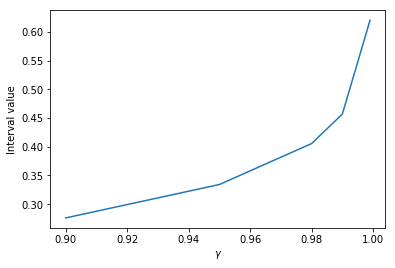

In [50]:
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7._

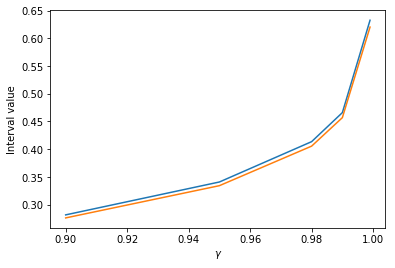

In [51]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

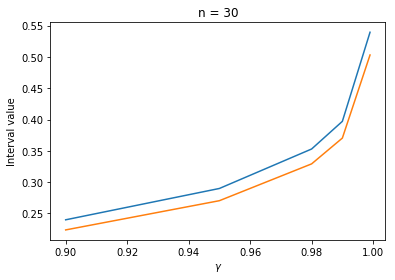

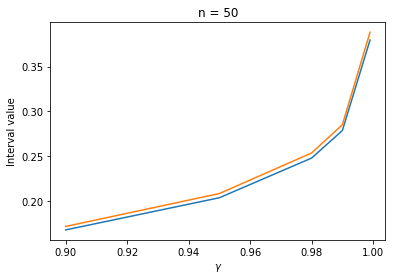

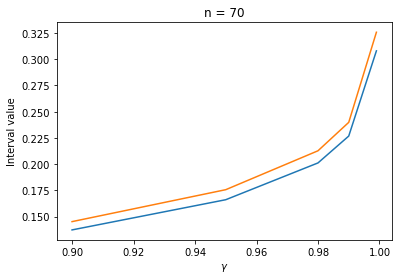

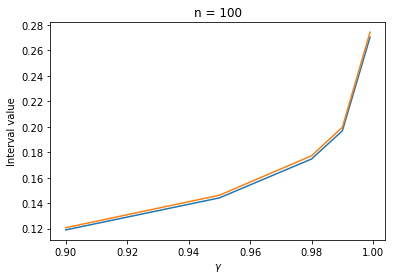

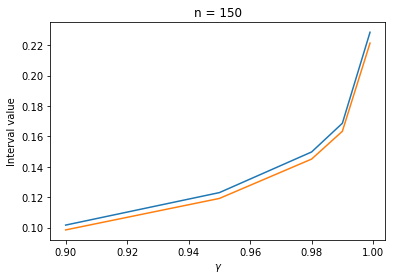

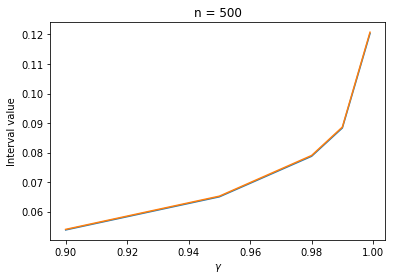

In [52]:
n_val = [ 30, 50, 70, 100, 150, 500 ]

all_ints = []

for t_n in n_val:
    sample = get_sample_data(t_n)
    
    ints = [ ]

    t_m = sum(sample) / t_n
    t_d = emp_d(sample, t_m, t_n)
    
    t_rv = sts.t(19)
    arr = t_rv.rvs(1000000)
    
    gamma_val_l = [ ]
    
    for i in gammas:
        gamma_val_l.append(sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])[0])
    
    for i in range(len(gammas)):
        left = t_m - math.sqrt(t_d) * gamma_val_l[i] / math.sqrt(t_n - 1)
        right = t_m + math.sqrt(t_d) * gamma_val_l[i] / math.sqrt(t_n - 1)
        ints.append((left, right))
    
    all_ints.append(ints)
    
    ints_t = [ ]

    for i in range(len(gammas)):
        left = MO - math.sqrt(dispt) * gamma_val_l[i] / math.sqrt(t_n - 1)
        right = MO + math.sqrt(dispt) *gamma_val_l[i] / math.sqrt(t_n - 1)

        ints_t.append((left, right))
    
    plt.plot(gammas, [i[1] - i[0] for i in ints])
    plt.plot(gammas, [i[1] - i[0] for i in ints_t])
    
    plt.xlabel("$\gamma$")
    plt.title('n = ' + str(t_n))
    plt.ylabel("Interval value")
    plt.show()

_1.10. Построить графики зависимости величины доверительного интервала от объема выборки._

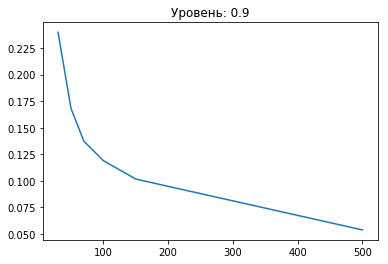

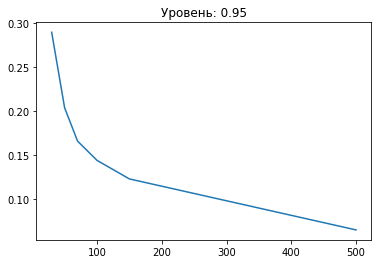

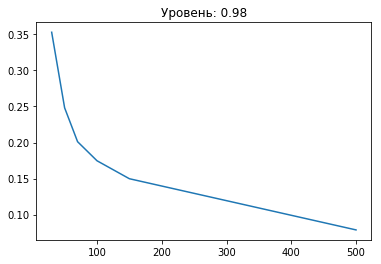

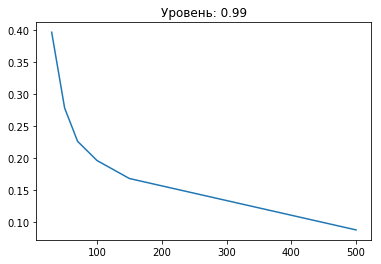

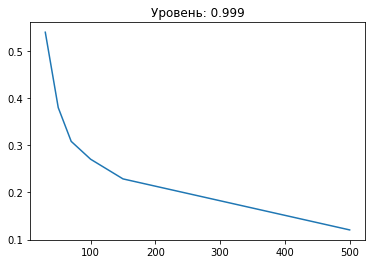

In [53]:
for a in range(len(all_ints[0])): 
    plt.title('Уровень: ' + str(gammas[a]))
    plt.plot(n_val, [(i[a][1] - i[a][0]) for i in all_ints])
    plt.show()

*__Задание 2.__* Доверительный интервал для дисперсии СВ.

_2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины._

Несмещенная состоятельная оценка дисперсии вычисляется по формуле:

$$S^2_0=\frac{1}{n-1}\sum_{i=0}^{n}(x_i-\bar{x})^2$$

In [54]:
n = 20
s4y2 = get_sample_data(n)

MO2 = sum(s4y2) / n
disp2 = emp_d(s4y2, MO2, n)

print('Точечная оценка дисперсии: ' + str(disp2))

Точечная оценка дисперсии: 0.08445338370429513


_2.2. Найти точечную оценку математического ожидания случайной величины._

Несмещенная состоятельная оценка мат. ожидания:

$$\bar{x}=\sum_{i=0}^{n}\frac{x_i}{n}$$

In [55]:
print('Несмещенная состоятельная оценка мат. ожидания: ' + str(MO2))

Несмещенная состоятельная оценка мат. ожидания: 1.7909713189931733


_2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости._

Уровенями значимости $\gamma$ будут служить значения $0.9$, $0.95$, $0.98$, $0.99$. Кол-во степеней свободы: $n-1=19$. По таблице определим значения для всех уровней значимости $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$:  
  
1) $\chi^2_{0.05, 19}=30.14353$ и $\chi^2_{0.95, 19}=10.11701$  
  
2) $\chi^2_{0.025, 19}=32.85233$ и $\chi^2_{0.975, 19}=8.90652$  
  
3) $\chi^2_{0.01, 19}=36.19087$ и $\chi^2_{0.99, 19}=7.63273$  
  
4) $\chi^2_{0.005, 19}=38.58226$ и $\chi^2_{0.995, 19}=6.84397$  
    
Построим доверительный интервал для каждых $\chi^2_{\frac{1-\gamma}{2}, n-1}$ и $\chi^2_{\frac{1+\gamma}{2}, n-1}$:

$$\frac{n\cdot s^2}{\chi^2_{\frac{1-\gamma}{2}, n-1}}\le D_x <\frac{n\cdot s^2}{\chi^2_{\frac{1+\gamma}{2}, n-1}}$$

In [56]:
d_intervals = [ ]

gammas2 = [0.9, 0.95, 0.98, 0.99 ]
hi_vals =  [ (30.14353, 10.11701), (32.85233, 8.90652), (36.19087, 7.63273), (38.58226, 6.84397) ]

for i in range(len(gammas2)):
    left = n * disp2 / hi_vals[i][0]
    right = n * disp2 / hi_vals[i][1]
    
    d_intervals.append((left, right))

tb6 = pd.DataFrame(data={"Интервал": [str(left) + ' < m < ' + str(right) for left, right in d_intervals], 
                         "$\gamma$": gammas2})
tb6

,Интервал,$\gamma$
0,0.05603416965716698 < m < 0.16695324746006007,0.90
1,0.051413938496475055 < m < 0.18964395455081248,0.95
2,0.046671098928705024 < m < 0.22129273196954466,0.98
3,0.043778349793037075 < m < 0.24679647545005348,0.99


_2.4. Построить график зависимости величины доверительного интервала от уровня значимости._

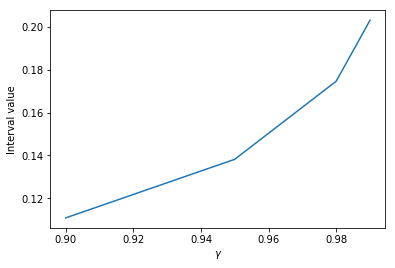

In [57]:
plt.plot(gammas2, [i[1] - i[0] for i in d_intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3)._

Плотность распределения равна $f(y) = \frac{1}{12 \cos^2(y)}, arctg(-4)<y<arctg(8)$. Тогда теоретическое МО будет равно:

$$M[X] = \int_{1}^{\sqrt5} \frac{x^2}{2}dx$$

[Решение на wolframalpha](https://www.wolframalpha.com/input/?i=int+x%5E2%2F2,x%3D1..sqrt(5))

In [58]:
MO_t = 1.6967

_2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости._


In [59]:
disp3 = emp_d(s4y2, MO_t, n)
d_intervals2 = []

for i in range(len(gammas2)):
    left = n * disp3 / hi_vals[i][0]
    right = n * disp3 / hi_vals[i][1]
    
    d_intervals2.append((left, right))

tb7 = pd.DataFrame(data={"Интервал": [str(left) + ' < m < ' + str(right) for left, right in d_intervals2], 
                         "$\gamma$": gammas2})
tb7

,Интервал,$\gamma$
0,0.06224102248478883 < m < 0.1854465033148041,0.90
1,0.057109012618006286 < m < 0.21065063891406594,0.95
2,0.05184081312499276 < m < 0.24580512195517287,0.98
3,0.04862763685955428 < m < 0.27413389136727756,0.99


_2.7. Построить график зависимости величины доверительного интервала от уровня значимости._

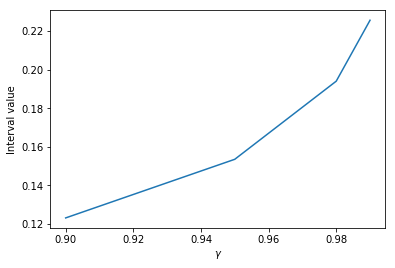

In [60]:
plt.plot(gammas2, [i[1] - i[0] for i in d_intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7._

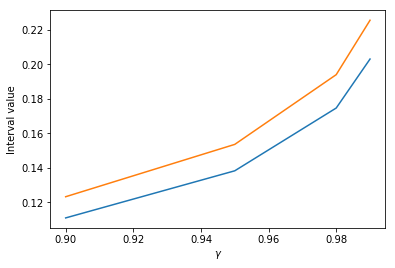

In [61]:
plt.plot(gammas2, [i[1] - i[0] for i in d_intervals])
plt.plot(gammas2, [i[1] - i[0] for i in d_intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

_2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150._

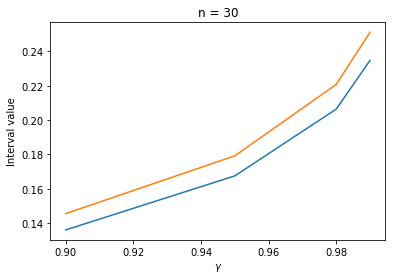

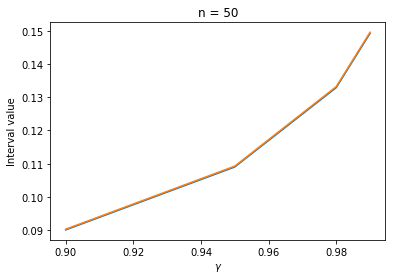

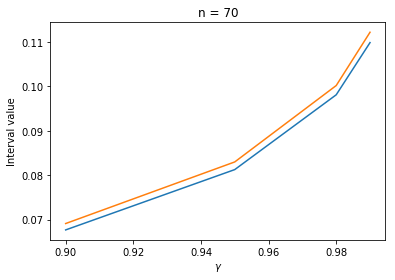

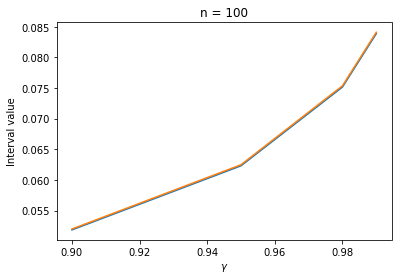

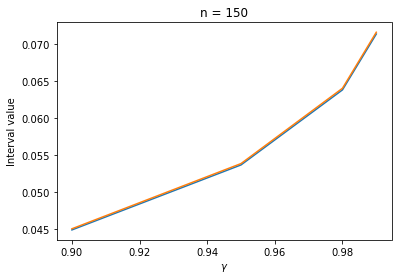

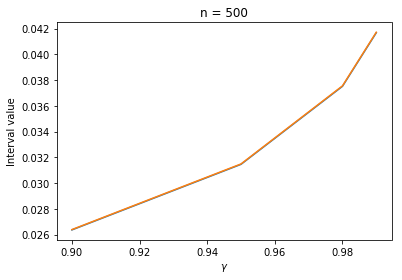

In [68]:
disp_all_ints = []

for temp_n in n_val:
    sample = get_sample_data(temp_n)
    
    dis_int = [ ]

    temp_mo = sum(sample) / temp_n
    temp_dis = emp_d(sample, temp_mo, temp_n)
    
    chi2_rv = sts.chi2(temp_n - 1)
    arr = chi2_rv.rvs(100000)
    
    hi_vals_l = []
    
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
        hi_vals_l.append((tmp[1], tmp[0]))
        #print(str(tmp[0]) + ' ' + str(tmp[1]))


    for i in range(len(gammas2)):
        left = temp_n * temp_dis / hi_vals_l[i][0]
        right = temp_n * temp_dis / hi_vals_l[i][1]

        dis_int.append((left, right))

    disp_all_ints.append(dis_int)
    
    dis_ints_t = [ ]

    for i in range(len(gammas2)):
        left = temp_n * emp_d(sample, MO_t, temp_n) / hi_vals_l[i][0]
        right = temp_n * emp_d(sample, MO_t, temp_n) / hi_vals_l[i][1]

        dis_ints_t.append((left, right))

    
    plt.plot(gammas2, [i[1] - i[0] for i in dis_int])
    plt.plot(gammas2, [i[1] - i[0] for i in dis_ints_t])
    
    plt.xlabel("$\gamma$")
    plt.title('n = ' + str(temp_n))
    plt.ylabel("Interval value")
    plt.show()

_2.10. Построить графики зависимости величины доверительного интервала от объема выборки._

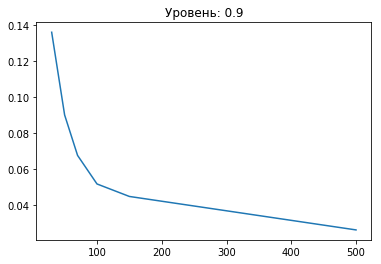

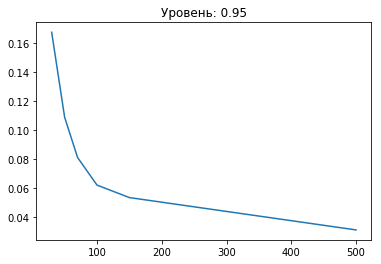

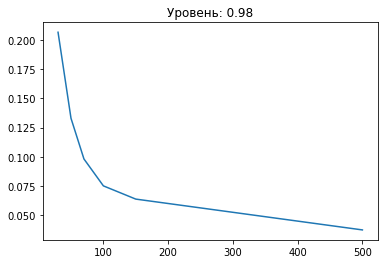

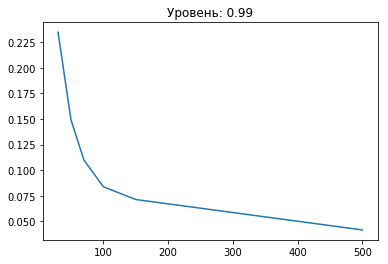

In [69]:
for a in range(len(all_ints2[0])): 
    plt.title('Уровень: ' + str(gammas2[a]))
#     for i in disp_all_ints:
#         print(str(i[0][1] - i[0][0]))
#         print(str(i[0][0]) + ' ' + str(i[0][1]) + '\n') 
    plt.plot(n_val, [(i[a][1] - i[a][0]) for i in disp_all_ints])
    plt.show()